### Import Packeges 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data Set.

In [4]:
data = pd.read_csv('Customer Churn.csv')

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Fill the blanck value as '0' in totalCharges also change the data type.


In [12]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", "0")
data['TotalCharges'] = data['TotalCharges'].astype('float')

### EDA:

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Count of null values 

In [16]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
data.duplicated().sum()

0

### Change the columns value SeniorCitizen '0' is "NO" & "1" is "YES".

In [22]:
def curn(values):
    if values == 1:
        return 'Yes'
    else:
        return 'No'


data['SeniorCitizen'] =  data['SeniorCitizen'].apply(curn)

In [26]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Visualize the data and show the how many customer churn our or not. 

In [40]:
gb = data.groupby('Churn').agg({'Churn':'count'})
gb

,Churn
Churn,
No,5174
Yes,1869


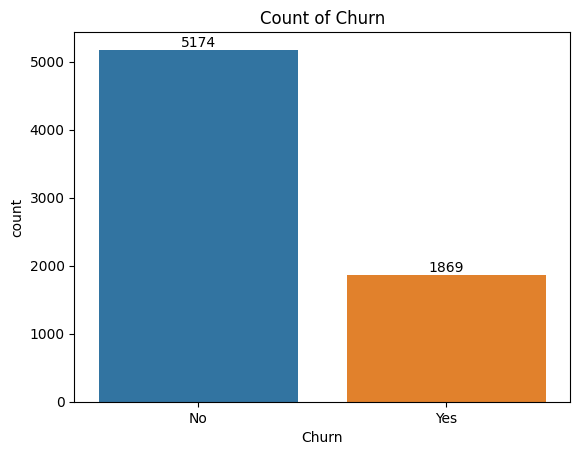

In [42]:
cc = sns.countplot(x='Churn', data=data)
cc.bar_label(cc.containers[0])
plt.title("Count of Churn")
plt.show()

### Percentage of Churn

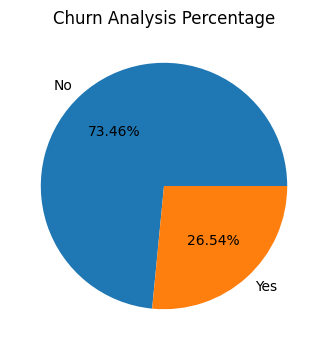

In [58]:
plt.figure(figsize = (5,4))
ch = data.groupby('Churn').agg({'Churn':'count'})
plt.pie(ch['Churn'], labels = ch.index, autopct = '%1.2f%%')
plt.title("Churn Analysis Percentage")
plt.show()

Based on the pie chart, we can conclude that 26.54% of our customers have churned.

### How does churn differ by gender in the bar chart?

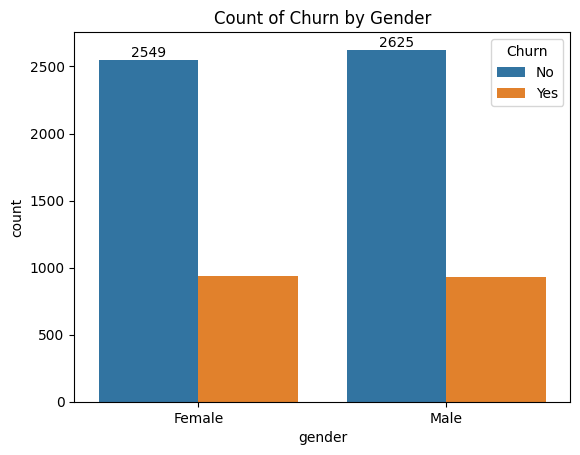

In [62]:
a = sns.countplot(x = 'gender', data = data , hue = 'Churn')
a.bar_label(a.containers[0])
plt.title("Count of Churn by Gender")
plt.show()

### How can we visualize the count of senior citizens in the dataset using a bar chart with labels?

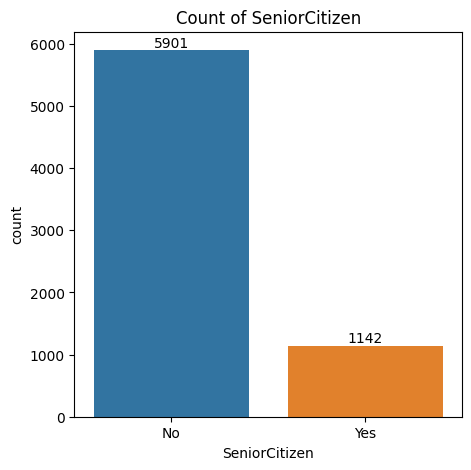

In [69]:
plt.figure(figsize = (5,5))
a = sns.countplot(x = 'SeniorCitizen', data = data)
a.bar_label(a.containers[0])
plt.title("Count of SeniorCitizen")
plt.show()

### How does the churn rate differ between senior citizens and non-senior citizens based on the count plot?

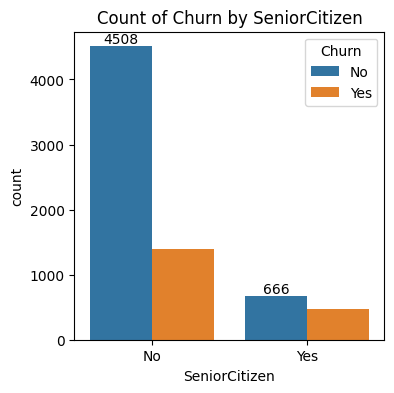

In [77]:
plt.figure(figsize = (4,4))
a = sns.countplot(x = 'SeniorCitizen', data = data , hue = 'Churn')
a.bar_label(a.containers[0])
plt.title("Count of Churn by SeniorCitizen")
plt.show()

### How is the distribution of customer tenure represented in the histogram?

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


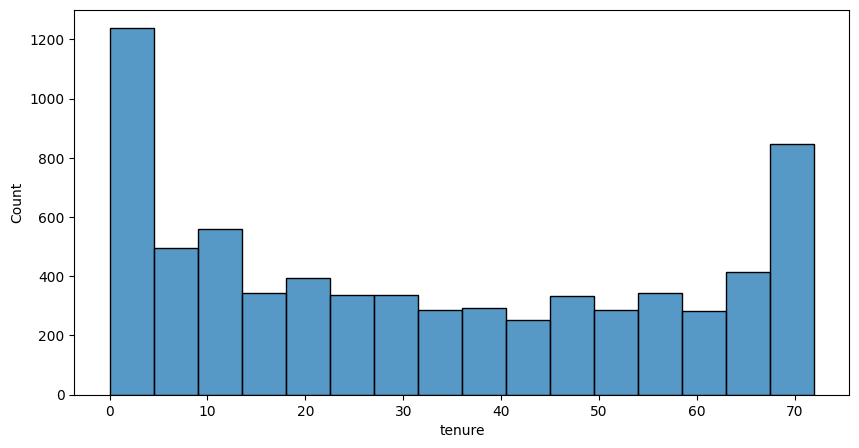

In [89]:
plt.figure(figsize = (10,5))
sns.histplot(x = 'tenure', data = data)
plt.show()

### What does the histogram reveal about the distribution of customer tenure based on churn?

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


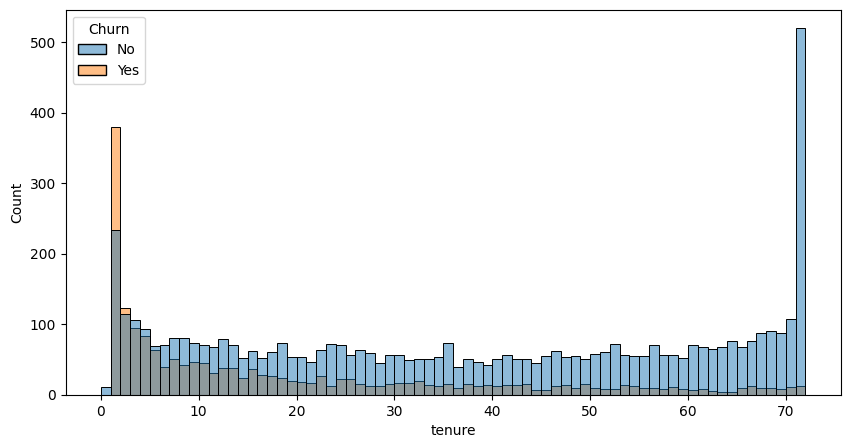

In [91]:
plt.figure(figsize = (10,5))
x = sns.histplot(x = 'tenure', data = data, bins = 72, hue = 'Churn')
plt.show()

#### Customers who have used our services for a longer period tend to stay, while those who have used our services for only 1 or 2 months are more likely to churn.

### How can I display the count labels on top the 'Contract' column?

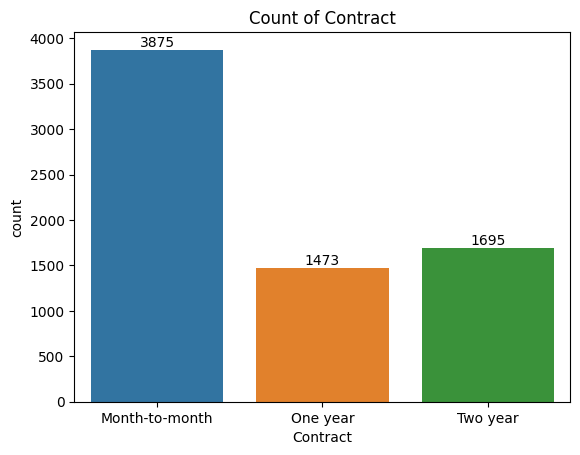

In [99]:
x = sns.countplot(x = 'Contract', data = data)
x.bar_label(x.containers[0])
plt.title('Count of Contract')
plt.show()

### What is the distribution of contract types among customers who churned and those who did not?

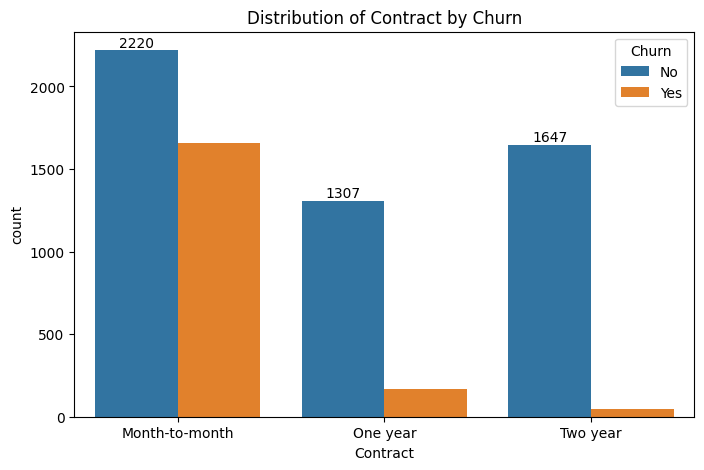

In [103]:
plt.figure(figsize = (8,5))
x = sns.countplot(x = 'Contract', data = data, hue = 'Churn')
x.bar_label(x.containers[0])
plt.title('Distribution of Contract by Churn')
plt.show()

people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 


In [106]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### How can I visualize the distribution of various categorical variables in a dataset using count plots, ensuring that all categories are displayed clearly?

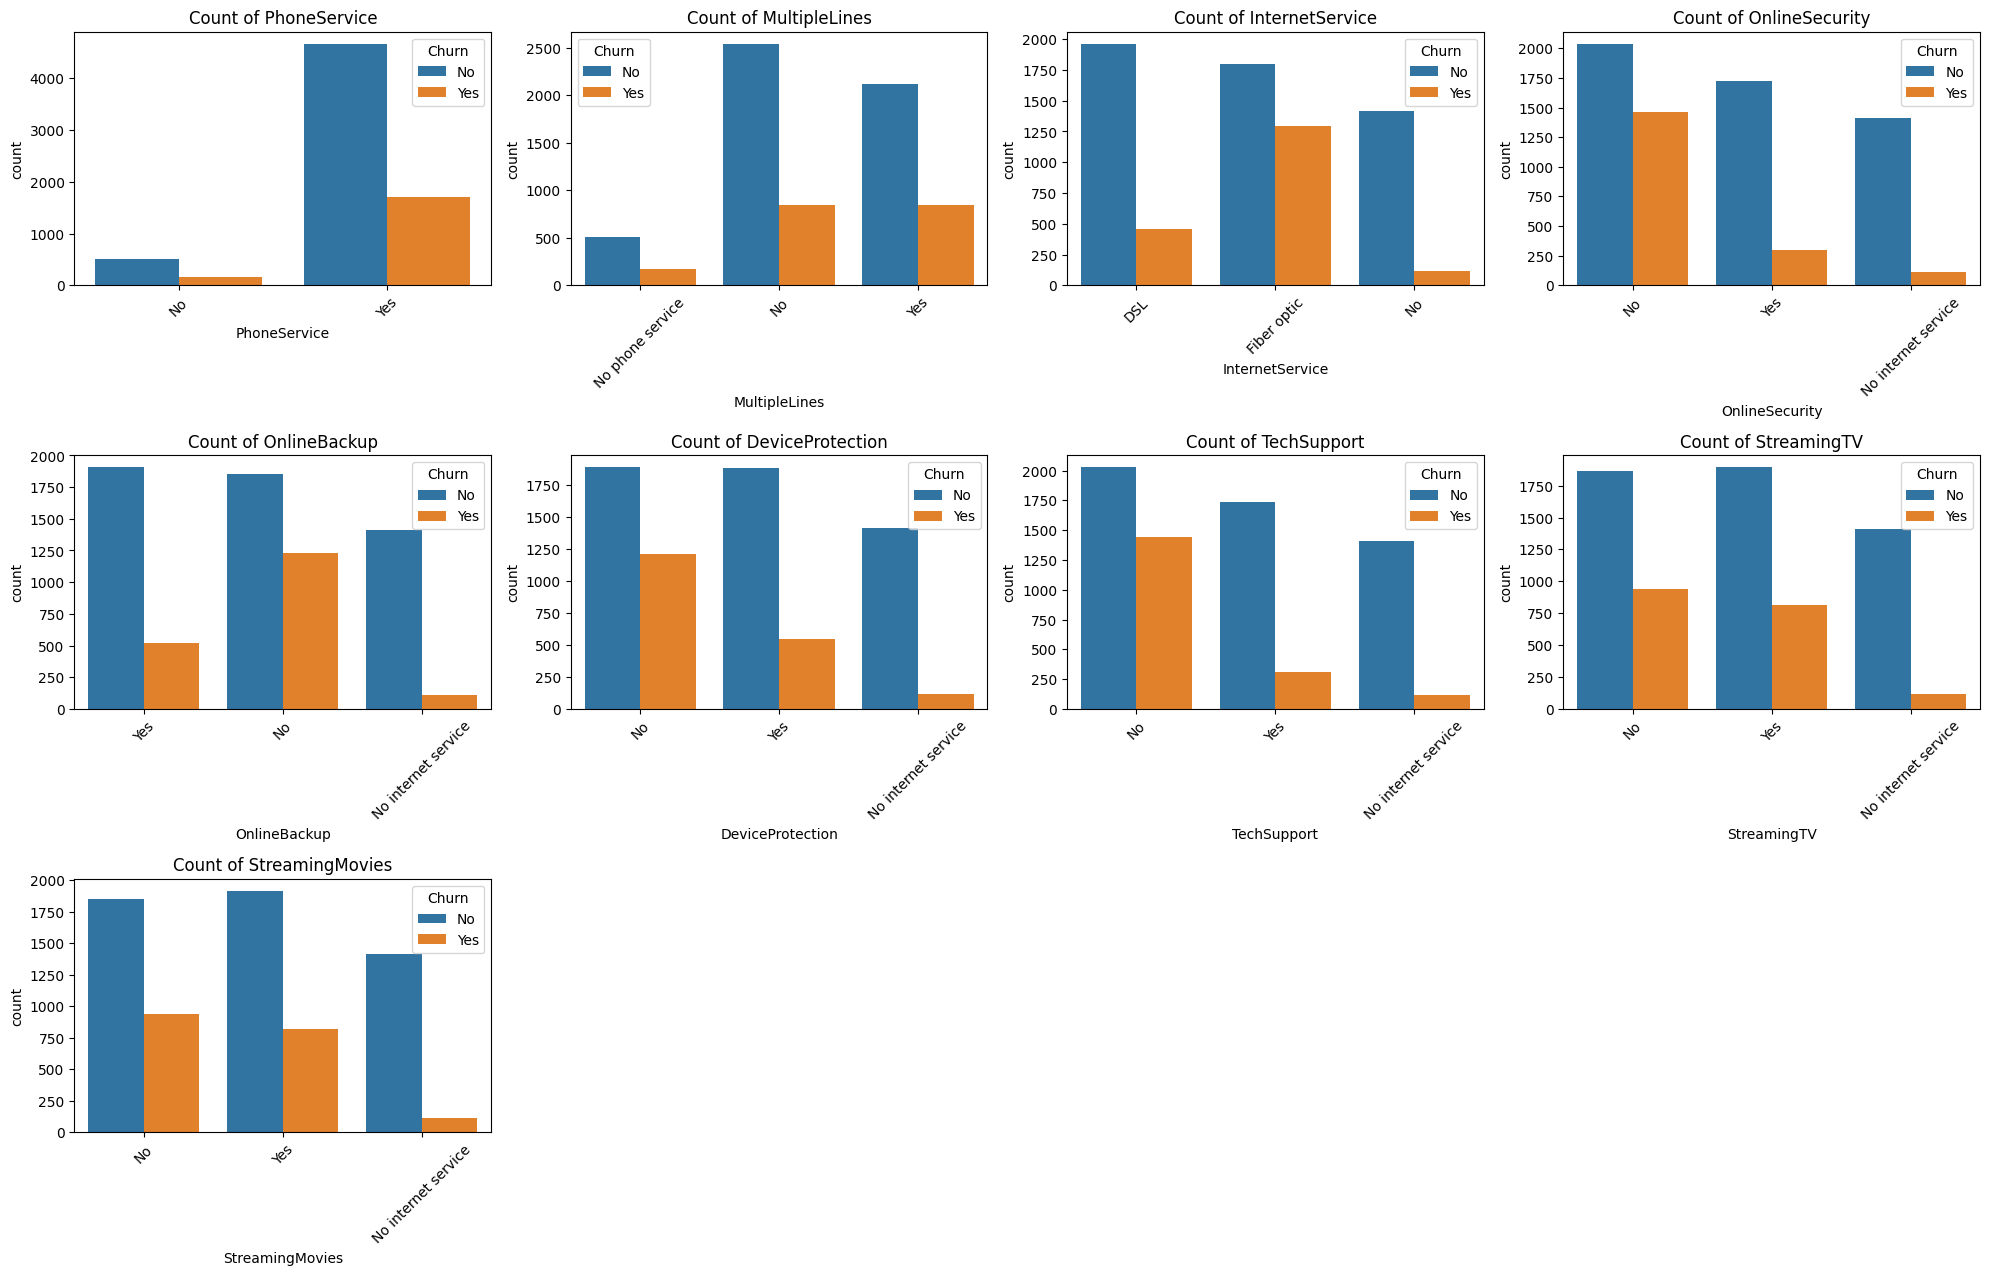

In [113]:
categorical_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20, 20))

# Loop through each column and create a subplot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 4, i)  # Adjust the grid size to 5 rows and 4 columns
    sns.countplot(x=col, data=data , hue = data['Churn'])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

Customers who retain their subscriptions are more likely to have essential services such as PhoneService, InternetService (especially DSL), and OnlineSecurity activated. In contrast, higher churn rates are observed among those who lack services like OnlineBackup, TechSupport, and StreamingTV or do not utilize them.

### How can I create a count plot to compare different categories of PaymentMethod based on Churn and add labels to each bar for better clarity?

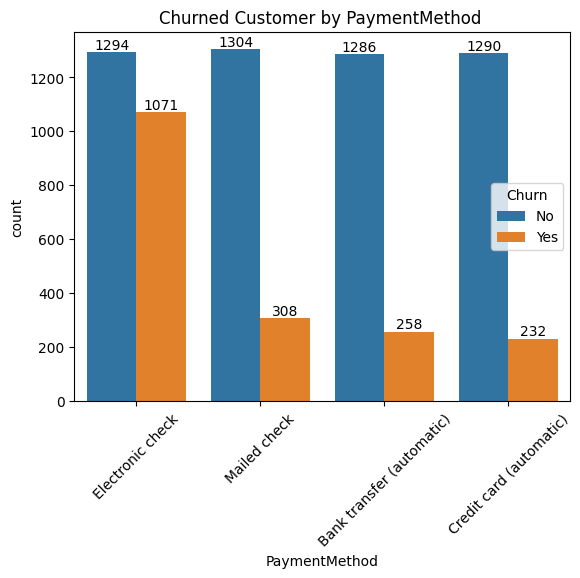

In [116]:
x = sns.countplot(x = 'PaymentMethod', data = data , hue = 'Churn')
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title("Churned Customer by PaymentMethod ")
plt.xticks(rotation = 45)
plt.show()

Customers paying via electronic check are more likely to churn compared to those using other payment methods.